# DBSCAN聚类

In [269]:
from scipy.io import loadmat#读取数据
import numpy as np
import matplotlib.pyplot as plt

## 加载数据
- 使用笑脸数据

In [270]:
path = '/home/ysq/桌面/数据挖掘/DBSCAN/data/smile.mat'
DATA = loadmat(path)
Data = DATA['smile']#含标签的数据
Data.shape

(266, 3)

## 取出不含标签的数据

In [271]:
data = Data[:,:2]
data.shape

(266, 2)

## 可视化数据

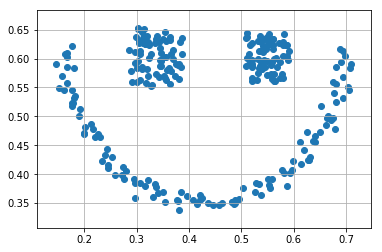

In [272]:
%matplotlib inline
x1 = data[:,:1]
x2 = data[:,1:2]
plt.scatter(x1,x2)
plt.grid()
plt.show()

# DBSCAN算法

In [273]:
class DBSCAN:
    """
        DBSCAN算法
    """
    def __init__(self,data,epsilon,Minpts):
        """
            初始化方法，data为传入的数据，epsilon为邻域半径，Minpts为判定核心对象的邻域内最少点数
        """
        self.data = data
        self.epsilon = epsilon
        self.Minpts = Minpts
    
    def Neighbor_list(self,j):
        """
            获取第j个元素的epsilon邻域列表,该列表包含了距离信息
        """
        xj = self.data[j]#获取数据集中的第j个点
        Dist = []#距离列表初始化为空
        for i in range(len(self.data)):
            #遍历数据集
            dist = np.linalg.norm((xj-self.data[i]),ord=2)#计算距离
            Dist.append(dist)#更新距离列表
        Dist.sort()#列表升序排列
        Neighbor = []#邻居列表初始化为空
        i = 0
        while i<len(Dist):
            if Dist[i] <= self.epsilon:
                #若距离小于等于epsilon，元素j拥有一个邻居
                Neighbor.append(Dist[i])
                i += 1
            else:
                break
        return Neighbor#返回一个包含距离的列表
    
    def Neighbor_list_for_sample(self,sample):
        """
            为特定元素计算邻居列表，返回的列表包含所有满足epsilon条件的邻居点坐标
        """
        Dist = []#储存距离的列表
        for i in range(len(self.data)):
            dist = np.linalg.norm((sample-self.data[i]),ord=2)
            Dist.append(dist)
        i = 0#指示器
        Neighbor = []#邻居列表
        while i < len(Dist):
            #遍历距离列表中所有元素
            if Dist[i] <= self.epsilon:
                Neighbor.append(tuple(self.data[i].tolist()))#将第i各元素加入邻居列表
            i += 1
        return set(Neighbor)#返回该元素的邻居集合
        
    def Core_Object(self):
        """
            寻找核心对象的方法，返回核心对象点的集合
        """
        m = len(self.data)#数据集的大小
        core_list = []#核心对象列表初始化为空
        for j in range(m):
            #遍历所有样本
            #获取邻居列表
            neighbor_list = self.Neighbor_list(j)
            if len(neighbor_list) >= self.Minpts:
                #满足Minpts条件时，将此点加入到核心对象列表中
                core_list.append(tuple(self.data[j].tolist()))#注意，为了使用集合运算，将ndarray转为了元组
        return set(core_list)
    
    def initialize_unvisited_sample(self):
        """
            初始化未访问样本集合为整个样本集，返回一个集合
        """
        Unvisited = []#未访问集合
        for i in range(len(self.data)):
            tmp = tuple(self.data[i].tolist())#当前元素转为元组
            Unvisited.append(tmp)
        return set(Unvisited)
            
    
    def fit(self):
        """
            聚类过程
        """
        core_list = self.Core_Object()#获取核心对象集合
        k = 0#聚类簇数
        C = []#聚类簇储存列表
        T = self.initialize_unvisited_sample()#初始化未访问样本集合
        while len(core_list)!=0:#当核心对象集合非空时
            T_old = T#记录当前未访问样本
            Object =  core_list.pop()#取一个核心对象并从核心对象集data1合中删除，使用pop
            Q = []#初始化一个队列，这里用列表模拟
            Q.append(Object)
            while len(Q)!=0:#当队列Q非空时
                q = Q.pop(0)#出队第一个元素
                Neighbor = self.Neighbor_list_for_sample(q)#寻找其epsilon邻域内的邻居,这些点为q密度可达的点
                if len(Neighbor)>=self.Minpts:#满足核心对象条件时
                    Delta = Neighbor & T #取交集,Delta表示当前密度可达的集合
                    for sample in Delta:
                        Q.append(sample)#添加至队列
                    T = T-Delta#从未访问集合中删除这些密度可达的点
            C.append(T_old - T)#聚类簇更新，求集合差集
            core_list = core_list - C[k]#更新核心对象集合，集合求差集
            k += 1
        return C#返回聚类簇列表      

## 初始化模型并训练

In [274]:
module = DBSCAN(data,0.03,5)#epsilon设置为0.03，Minpts设置为5
x = module.fit()

## 对聚类结果可视化

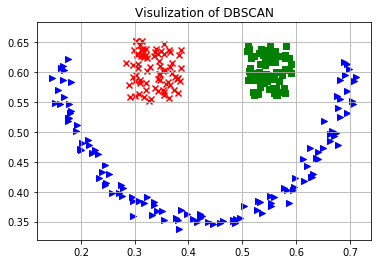

In [275]:
#set转list
list0 = list(x[0])
list1 = list(x[1])
list2 = list(x[2])
array0 = np.array(list0)
array1 = np.array(list1)
array2 = np.array(list2)
#按照坐标切片
array0_x1 = array0[:,:1]
array0_x2 = array0[:,1:]
array1_x1 = array1[:,:1]
array1_x2 = array1[:,1:]
array2_x1 = array2[:,:1]
array2_x2 = array2[:,1:]
#绘图
plt.title('Visulization of DBSCAN')
plt.scatter(array0_x1,array0_x2,c='red',marker='x')
plt.scatter(array1_x1,array1_x2,c='blue',marker='>')
plt.scatter(array2_x1,array2_x2,c='green',marker='s')
plt.grid()
plt.show()

## 在其他数据集上的效果
- 月亮数据


In [276]:
Data1 = DATA['moon']
data1 = Data1[:,:2] 
data1.shape
len(data1)

210

## 数据可视化

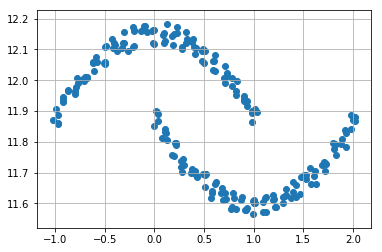

In [277]:
x_1 = data1[:,:1]
x_2 = data1[:,1:2]
plt.grid()
plt.scatter(x_1,x_2)
plt.show()

## 初始化模型并训练

In [347]:
module1 = DBSCAN(data1,0.2,5)#epsilon设置为0.2，Minpts设置为5
x1 = module1.fit()

## 结果可视化

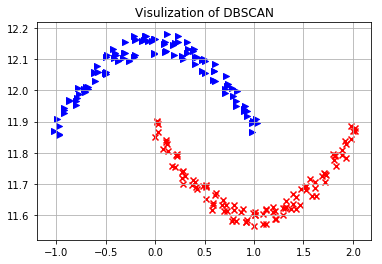

In [349]:
#set转list
list_0 = list(x1[0])
list_1 = list(x1[1])

array_0 = np.array(list_0)
array_1 = np.array(list_1)

#按照坐标切片
array_0_x1 = array_0[:,:1]
array_0_x2 = array_0[:,1:]
array_1_x1 = array_1[:,:1]
array_1_x2 = array_1[:,1:]
#绘图
plt.title('Visulization of DBSCAN')
plt.scatter(array_0_x1,array_0_x2,c='red',marker='x')
plt.scatter(array_1_x1,array_1_x2,c='blue',marker='>')
plt.grid()
plt.show()

- 方形数据

In [353]:
path1 = '/home/ysq/桌面/数据挖掘/DBSCAN/data/square1.mat'
DATA1 = loadmat(path1)
Data2 = DATA1['square1']

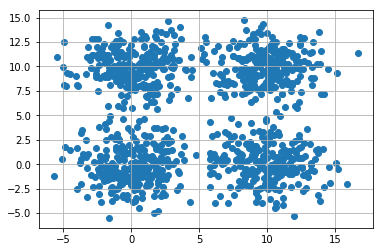

In [358]:
data2 = Data2[:,:2]
#数据可视化
m1 = data2[:,:1]
m2 = data2[:,1:]
plt.scatter(m1,m2)
plt.grid()
plt.show()

## 初始化模型并训练

In [362]:
module2 = DBSCAN(data2,1,5)
x2 = module2.fit()

## 结果可视化

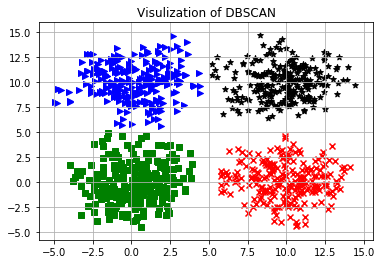

In [365]:
#set转list
_list0 = list(x2[0])
_list1 = list(x2[1])
_list2 = list(x2[2])
_list3 = list(x2[3])

_array0 = np.array(_list0)
_array1 = np.array(_list1)
_array2 = np.array(_list2)
_array3 = np.array(_list3)

#按照坐标切片
_array0_x1 = _array0[:,:1]
_array0_x2 = _array0[:,1:]
_array1_x1 = _array1[:,:1]
_array1_x2 = _array1[:,1:]
_array2_x1 = _array2[:,:1]
_array2_x2 = _array2[:,1:]
_array3_x1 = _array3[:,:1]
_array3_x2 = _array3[:,1:]

#绘图
plt.title('Visulization of DBSCAN')
plt.scatter(_array0_x1,_array0_x2,c='red',marker='x')
plt.scatter(_array1_x1,_array1_x2,c='blue',marker='>')
plt.scatter(_array2_x1,_array2_x2,c='green',marker='s')
plt.scatter(_array3_x1,_array3_x2,c='black',marker='*')
plt.grid()
plt.show()